In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Next, we'll load the Iris flower dataset
iris = pd.read_csv("/content/Iris.csv")
# Let's see what's in the iris data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydot
import pickle
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import pydotplus
import pydot
from io import StringIO
#import os

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# get rid of the Id column - don't need it
iris = iris.drop('Id', axis=1)

In [ ]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

#Feature Columns
feature_columns = ['SepalLength (Cm)','SepalWidth (Cm)','PetalLength (Cm)','PetalLength (Cm)']

#Splitting the dataset into the training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

#Create the a
ID = pd.DataFrame(range(1,len(y_test) + 1,1))

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Create Decision Tree classifier object
classifier = DecisionTreeClassifier()

#Train Decision Tree Classifier
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [ ]:
#evaluate accuracy
eval_model = metrics.accuracy_score(y_test,y_pred)

print("Accuracy : ",eval_model)

Accuracy :  0.9777777777777777


In [ ]:
#Showing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

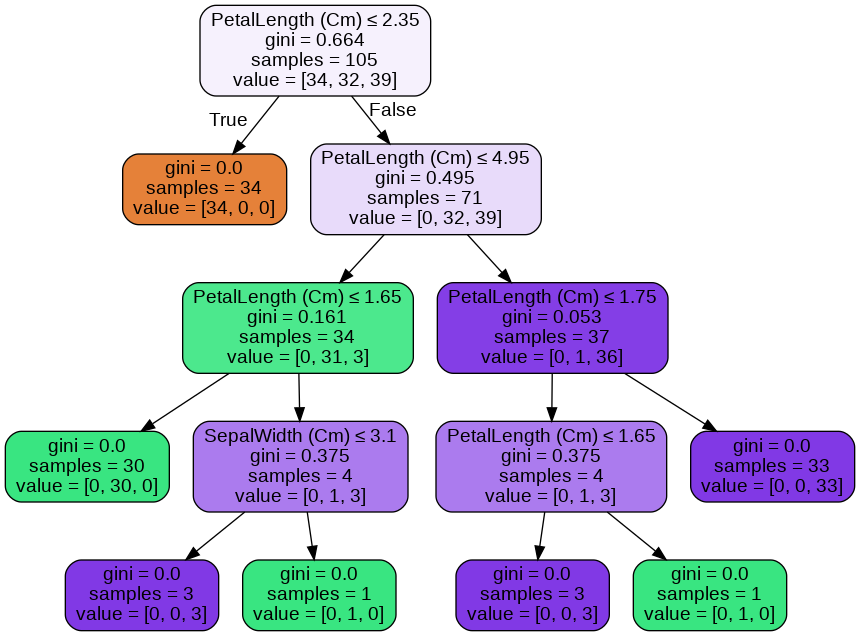

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names=feature_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Creating an Image
Image(graph.create_png())

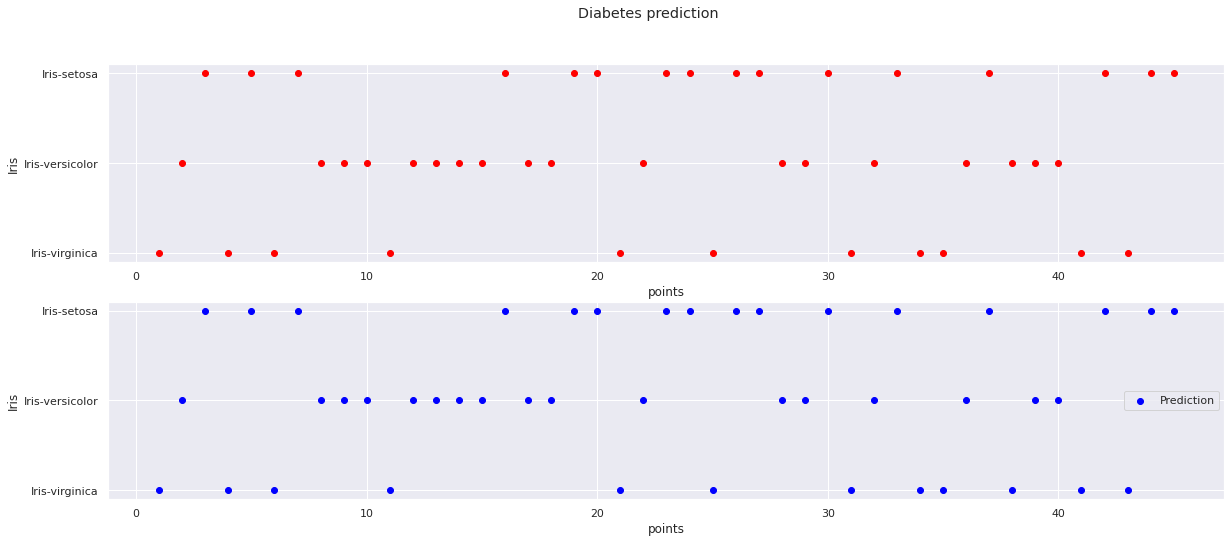

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)

fig,axs = plt.subplots(2)
fig.suptitle('Diabetes prediction')

axs[0].scatter(ID,y_test,color = 'red',label="Actual")
axs[1].scatter(ID,y_pred,color = 'blue',label="Prediction")

for ax in axs.flat:
  ax.set(xlabel='points', ylabel='Iris')

plt.legend()
plt.show()